In [ ]:
# choc_data_original = original dataset without change
# choc_data = input after one hot encoding
# choc_embed = embeddings with centroid and p2centroid
# choc_embed_final = only embeddings
# choc_embed_array = array form of embed_final

In [ ]:
#@title Run to load and clean the dataset
%reset -f
from __future__ import print_function

import math
import numpy as np
import numpy.linalg as nla
import pandas as pd
import re
import six
from os.path import join
from matplotlib import pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


# Set the output display to have one digit for decimal places and limit it to
# printing 15 rows.
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 15

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
test_df = pd.read_csv("test.csv")
choc_data = pd.read_csv("content.csv")
user_df = pd.read_csv("user.csv")

In [68]:
relationship_df = pd.read_csv("relationship_afterDeletedCols.csv")

In [ ]:
choc_data.head(10)

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10
5,cont_51_1_37,series,hindi,comedy,3060000,2002-02-04,10,37,1
6,cont_2208_1_24,series,marathi,drama,3600000,2011-07-09,7,24,1
7,cont_2679_5_17,series,hindi,comedy,3240000,1994-05-03,7,17,5
8,cont_4790_4_19,series,marathi,drama,3060000,2020-12-18,1,19,4
9,cont_1437_5_25,series,hindi,comedy,2880000,2002-05-27,1,25,5


In [ ]:
choc_data_original = choc_data.copy()

In [ ]:
# for col in col_names:
#     encoder = LabelEncoder()
#     encoder.fit(choc_data[col])
#     choc_data[col] = encoder.transform(choc_data[col])


In [ ]:
# choc_data_copy = choc_data[['duration','rating']]
# scaler = StandardScaler().fit(choc_data_copy.values)
# choc_data_copy = scaler.transform(choc_data_copy.values)

In [ ]:
# choc_data[['duration', 'rating']] = choc_data_copy

In [ ]:
choc_data_original.head()

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10


In [ ]:
onehot = OneHotEncoder(dtype=np.int, sparse=True)
one_hot_fit = onehot.fit_transform(choc_data[['content_type', 'language', 'genre']])
column_name = onehot.get_feature_names(['content_type', 'language', 'genre'])
nominals = pd.DataFrame(one_hot_fit.toarray(), columns=column_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
nominals.head()

,content_type_movies,content_type_series,content_type_sports,content_type_teasers,language_bengali,language_english,language_gujarati,language_hindi,language_kannada,language_malayalam,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
choc_data[column_name] = nominals[column_name]
choc_data = choc_data.drop(['content_type', 'language', 'genre', 'duration', 'release_date'], axis=1)

In [ ]:
choc_data.head()

,content_id,rating,episode_count,season_count,content_type_movies,content_type_series,content_type_sports,content_type_teasers,language_bengali,language_english,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
0,cont_475_19_32,10,32,19,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,cont_2185_15_21,4,21,15,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,cont_4857_13_28,8,28,13,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,cont_3340_1_5,0,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,cont_1664_10_29,2,29,10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
column_name

array(['content_type_movies', 'content_type_series',
       'content_type_sports', 'content_type_teasers', 'language_bengali',
       'language_english', 'language_gujarati', 'language_hindi',
       'language_kannada', 'language_malayalam', 'language_marathi',
       'language_oriya', 'language_punjabi', 'language_tamil',
       'language_telugu', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_badminton', 'genre_basketball',
       'genre_biography', 'genre_comedy', 'genre_cricket', 'genre_crime',
       'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_football', 'genre_hockey', 'genre_horror',
       'genre_musical', 'genre_mystery', 'genre_sci-fi', 'genre_sport',
       'genre_tennis', 'genre_thriller'], dtype=object)

In [ ]:
#@title Functions to Build and Train a Similarity DNN Model

class SimilarityModel(object):
  """Class to build, train, and inspect a Similarity Model.

  This class builds a deep neural network that maps a dataset of entities
  with heterogenous features to an embedding space.
  Given a dataset as a pandas dataframe, determine the model by specifying
  the set of features used as input and as labels to the DNN, and the
  size of each hidden layer. The data is mapped to the embedding space
  in the last hidden layer.
  
  To build an auto-encoder, make the set of output features identical to the set
  of input features. Alternatively, build a predictor by using a single feature
  as the label. When using a single feature as a label, ensure
  this feature is removed from the input, or add at least
  one hidden layer of a sufficiently low dimension such that the model cannot
  trivially learn the label.
  Caveat: The total loss being minimized is a simple sum of losses for each
    output label (plus the regularization). If the output feature set combines
    sparse and dense features, the total loss is a sum of cross-entropy soft-max
    losses with root mean squared error losses, potentially in different scales,
    which could emphasis some output labels more than others.
  """

  def __init__(self,
               dataframe,
               input_feature_names,
               output_feature_names,
               dense_feature_names,
               sparse_input_feature_embedding_dims,
               hidden_dims=[32],
               l2_regularization=0.0,
               use_bias=True,
               batch_size=100,
               inspect=False):
    """Build a similarity model.

    Args:
      dataframe: the pandas dataframe used to train and validate the model.
      input_feature_names: list of strings, names of input feature columns.
      output_feature_names: list of strings, names of output feature columns.
      dense_feature_names: list of strings, names of feature columns that are
        treated as dense. All other feature columns are treated as sparse.
      sparse_input_feature_embedding_dims: dictionary that maps feature names to
        ints, expressing the embedding dimension of each input feature. Any
        sparse feature in input_feature_names must be in this dictionary.
      hidden_dims: list of ints, dimensions of each hidden layer. These hidden
        layers are not counting the first layer which is a concatenation of the
        input embeddings and the dense input features. Hence, this list can be
        empty, in which case the outputs of the network are directly connected
        to the input embeddings and/or dense inputs.
      use_bias: bool, if true, add a bias term to each hidden layer.
      batch_size: int, batch size.
      inspect: bool, if true, add each tensor of the model to the list of
        tensors that are inspected.
    """
    used_feature_names = tuple(
        set(input_feature_names).union(output_feature_names))
    sparse_feature_names = tuple(
        set(used_feature_names).difference(dense_feature_names))
    # Dictionary mapping each sparse feature column to its vocabulary.
    ### sparse_feature_vocabs = { 'maker': [u'A. Morin', u'AMMA', ...], ... }
    sparse_feature_vocabs = {
        sfn: sorted(list(set(choc_data[sfn].values)))
        for sfn in sparse_feature_names
    }

    # Sparse output features are mapped to ids via tf.feature_to_id, hence
    # we need key-id pairs for these vocabularies.
    sparse_output_feature_names = (
        tuple(set(sparse_feature_names).intersection(output_feature_names)))
    keys_and_values = {}
    for fn in sparse_output_feature_names:
      keys = tf.constant(
          sparse_feature_vocabs[fn],
          dtype=tf.string,
          name='{}_vocab_keys'.format(fn))
      values = tf.range(
          len(sparse_feature_vocabs[fn]),
          dtype=tf.int64,
          name='{}_vocab_values'.format(fn))
      keys_and_values[fn] = (keys, values)

    # Class instance data members.
    self._session = None
    self._loss = None
    self._metrics = {}
    self._embeddings = None
    self._vars_to_inspect = {}

    def split_dataframe(df, holdout_fraction=0.1):
      """Splits a pandas dataframe into training and test sets.

      Args:
        df: the source pandas dataframe.
        holdout_fraction: fraction of dataframe rows to use in the test set.

      Returns:
        A pair of non-overlapping pandas dataframe for training and holdout.
      """
      test = df.sample(frac=holdout_fraction, replace=False)
      train = df[~df.index.isin(test.index)]
      return train, test

    train_dataframe, test_dataframe = split_dataframe(dataframe)

    def make_batch(dataframe, batch_size):
      """Creates a batch of examples.

      Args:
        dataframe: a panda dataframe with rows being examples and with
          columns being feature columns.
        batch_size: the batch size.

      Returns:
        A dictionary of tensors, keyed by their feature names.
        Each tensor is of shape [batch_size]. Tensors for sparse features are of
        strings, while tensors for dense features are of floats.
      """
      used_features = {ufn: dataframe[ufn] for ufn in used_feature_names}
      batch = (
          tf.data.Dataset.from_tensor_slices(used_features).shuffle(1000)
          .repeat().batch(batch_size).make_one_shot_iterator().get_next())
      if inspect:
        for k, v in six.iteritems(batch):
          self._vars_to_inspect['input_%s' % k] = v
      return batch

    def generate_feature_columns(feature_names):
      """Creates the list of used feature columns.

      Args:
        feature_names: an iterable of strings with the names of the features for
          which feature columns are generated.

      Returns:
        A dictionary, keyed by feature names, of _DenseColumn and
        _NumericColumn.
      """
      used_sparse_feature_names = (
          tuple(set(sparse_feature_names).intersection(feature_names)))
      used_dense_feature_names = (
          tuple(set(dense_feature_names).intersection(feature_names)))
      f_columns = {}
      for sfn in used_sparse_feature_names:
        sf_column = tf.feature_column.categorical_column_with_vocabulary_list(
            key=sfn,
            vocabulary_list=sparse_feature_vocabs[sfn],
            num_oov_buckets=0)
        f_columns[sfn] = tf.feature_column.embedding_column(
            categorical_column=sf_column,
            dimension=sparse_input_feature_embedding_dims[sfn],
            combiner='mean',
            initializer=tf.truncated_normal_initializer(stddev=.1))
      for dfn in used_dense_feature_names:
        f_columns[dfn] = tf.feature_column.numeric_column(dfn)
      return f_columns

    def create_tower(features, columns):
      """Creates the tower mapping features to embeddings.

      Args:
        features: a dictionary of tensors of shape [batch_size], keyed by
          feature name. Sparse features are associated to tensors of strings,
          while dense features are associated to tensors of floats.
        columns: a dictionary, keyed by feature names, of _DenseColumn and
          _NumericColumn.

      Returns:
        A pair of elements: hidden_layer and output_layer.
          hidden_layer is a tensor of shape [batch_size, hidden_dims[-1]].
          output_layer is a dictionary keyed by the output feature names, of
            dictionaries {'labels': labels, 'logits': logits}.
            Dense output features have both labels and logits as float tensors 
            of shape [batch_size, 1]. Sparse output features have labels as
            string tensors of shape [batch_size, 1] and logits as float tensors
            of shape [batch_size, len(sparse_feature_vocab)].
      """
      # TODO: sanity check the arguments.
      # Input features.
      input_columns = [columns[fn] for fn in input_feature_names]
      hidden_layer = tf.feature_column.input_layer(features, input_columns)
      dense_input_feature_names = (
          tuple(set(dense_feature_names).intersection(input_feature_names)))
      input_dim = (
          sum(sparse_input_feature_embedding_dims.values()) +
          len(dense_input_feature_names))
      for layer_idx, layer_output_dim in enumerate(hidden_dims):
        w = tf.get_variable(
            'hidden%d_w_' % layer_idx,
            shape=[input_dim, layer_output_dim],
            initializer=tf.truncated_normal_initializer(
                stddev=1.0 / np.sqrt(layer_output_dim)))
        if inspect:
          self._vars_to_inspect['hidden%d_w_' % layer_idx] = w
        hidden_layer = tf.matmul(hidden_layer, w)  # / 10.)
        if inspect:
          self._vars_to_inspect['hidden_layer_%d' % layer_idx] = hidden_layer
        input_dim = layer_output_dim
      # Output features.
      output_layer = {}
      for ofn in output_feature_names:
        if ofn in sparse_feature_names:
          feature_dim = len(sparse_feature_vocabs[ofn])
        else:
          feature_dim = 1
        w = tf.get_variable(
            'output_w_%s' % ofn,
            shape=[input_dim, feature_dim],
            initializer=tf.truncated_normal_initializer(stddev=1.0 /
                                                        np.sqrt(feature_dim)))
        if inspect:
          self._vars_to_inspect['output_w_%s' % ofn] = w
        if use_bias:
          bias = tf.get_variable(
              'output_bias_%s' % ofn,
              shape=[1, feature_dim],
              initializer=tf.truncated_normal_initializer(stddev=1.0 /
                                                          np.sqrt(feature_dim)))
          if inspect:
            self._vars_to_inspect['output_bias_%s' % ofn] = bias
        else:
          bias = tf.constant(0.0, shape=[1, feature_dim])
        output_layer[ofn] = {
            'labels':
                features[ofn],
            'logits':
                tf.add(tf.matmul(hidden_layer, w), bias)  # w / 10.), bias)
        }
        if inspect:
          self._vars_to_inspect['output_labels_%s' %
                                ofn] = output_layer[ofn]['labels']
          self._vars_to_inspect['output_logits_%s' %
                                ofn] = output_layer[ofn]['logits']
      return hidden_layer, output_layer

    def similarity_loss(top_embeddings, output_layer):
      """Build the loss to be optimized.

      Args:
        top_embeddings: First element returned by create_tower.
        output_layer: Second element returned by create_tower.

      Returns:
        total_loss: A tensor of shape [1] with the total loss to be optimized.
        losses: A dictionary keyed by output feature names, of tensors of shape
          [1] with the contribution to the loss of each output feature.
      """
      losses = {}
      total_loss = tf.scalar_mul(l2_regularization,
                                 tf.nn.l2_loss(top_embeddings))
      for fn, output in six.iteritems(output_layer):
        if fn in sparse_feature_names:
          losses[fn] = tf.reduce_mean(
              tf.nn.sparse_softmax_cross_entropy_with_logits(
                  logits=output['logits'],
                  labels=tf.feature_to_id(
                      output['labels'], keys_and_values=keys_and_values[fn])))
        else:
          losses[fn] = tf.sqrt(
              tf.reduce_mean(
                  tf.square(output['logits'] -
                            tf.cast(output['labels'], tf.float32))))
        total_loss += losses[fn]
      return total_loss, losses

    # Body of the constructor.
    input_feature_columns = generate_feature_columns(input_feature_names)
    # Train
    with tf.variable_scope('model', reuse=False):
      train_hidden_layer, train_output_layer = create_tower(
          make_batch(train_dataframe, batch_size), input_feature_columns)
      self._train_loss, train_losses = similarity_loss(train_hidden_layer,
                                                       train_output_layer)
    # Test
    with tf.variable_scope('model', reuse=True):
      test_hidden_layer, test_output_layer = create_tower(
          make_batch(test_dataframe, batch_size), input_feature_columns)
      test_loss, test_losses = similarity_loss(test_hidden_layer,
                                               test_output_layer)
    # Whole dataframe to get final embeddings
    with tf.variable_scope('model', reuse=True):
      self._hidden_layer, _ = create_tower(
          make_batch(dataframe, dataframe.shape[0]), input_feature_columns)
    # Metrics is a dictionary of dictionaries of dictionaries.
    # The 3 levels are used as plots, line colors, and line styles respectively.
    self._metrics = {
        'total': {
            'train': {'loss': self._train_loss},
            'test': {'loss': test_loss}
        },
        'feature': {
            'train': {'%s loss' % k: v for k, v in six.iteritems(train_losses)},
            'test': {'%s loss' % k: v for k, v in six.iteritems(test_losses)}
        }
    }

  def train(self,
            num_iterations=30,
            learning_rate=1.0,
            plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):
    """Trains the model.

    Args:
      num_iterations: int, the number of iterations to run.
      learning_rate: float, the optimizer learning rate.
      plot_results: bool, whether to plot the results at the end of training.
      optimizer: tf.train.Optimizer, the optimizer to be used for training.
    """
    with self._train_loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._train_loss)
      opt_init_op = tf.variables_initializer(opt.variables())
      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          self._session.run(tf.global_variables_initializer())
          self._session.run(tf.local_variables_initializer())
          self._session.run(tf.tables_initializer())
          tf.train.start_queue_runners()

    with self._session.as_default():
      self._session.run(opt_init_op)
      if plot_results:  
        iterations = []
        metrics_vals = {k0: {k1: {k2: []
                                  for k2 in v1}
                             for k1, v1 in six.iteritems(v0)}
                        for k0, v0 in six.iteritems(self._metrics)}

      # Train and append results.
      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, self._metrics))

        # Printing the 1 liner with losses.
        if (i % 10 == 0) or i == num_iterations:
          print('\riteration%6d,   ' % i + ',   '.join(
              ['%s %s %s: %7.3f' % (k0, k1, k2, v2)
               for k0, v0 in six.iteritems(results)
               for k1, v1 in six.iteritems(v0)
               for k2, v2 in six.iteritems(v1)])
                , end=" "
               )
          if plot_results:
            iterations.append(i)
            for k0, v0 in six.iteritems(results):
              for k1, v1 in six.iteritems(v0):
                for k2, v2 in six.iteritems(v1):
                  metrics_vals[k0][k1][k2].append(results[k0][k1][k2])

      # Feedforward the entire dataframe to get all the embeddings.
      self._embeddings = self._session.run(self._hidden_layer)

      # Plot the losses and embeddings.
      if plot_results:
        num_subplots = len(metrics_vals) + 1
        colors = 10 * ('red', 'blue', 'black', 'green')
        styles = 10 * ('-', '--', '-.', ':')
        # Plot the metrics.
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i0, (k0, v0) in enumerate(six.iteritems(metrics_vals)):
          ax = fig.add_subplot(1, num_subplots, i0+1)
          ax.set_title(k0)
          for i1, (k1, v1) in enumerate(six.iteritems(v0)):
            for i2, (k2, v2) in enumerate(six.iteritems(v1)):
              ax.plot(iterations, v2, label='%s %s' % (k1, k2),
                      color=colors[i1], linestyle=styles[i2])
          ax.set_xlim([1, num_iterations])
          ax.set_yscale('log')
          ax.legend()
        # Plot the embeddings (first 3 dimensions).
        ax.legend(loc='upper right')
        ax = fig.add_subplot(1, num_subplots, num_subplots)
        ax.scatter(
            self._embeddings[:, 0], self._embeddings[:, 1],
            alpha=0.5, marker='o')
        ax.set_title('embeddings')


  @property
  def embeddings(self):
    return self._embeddings

------ build model
Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn AP

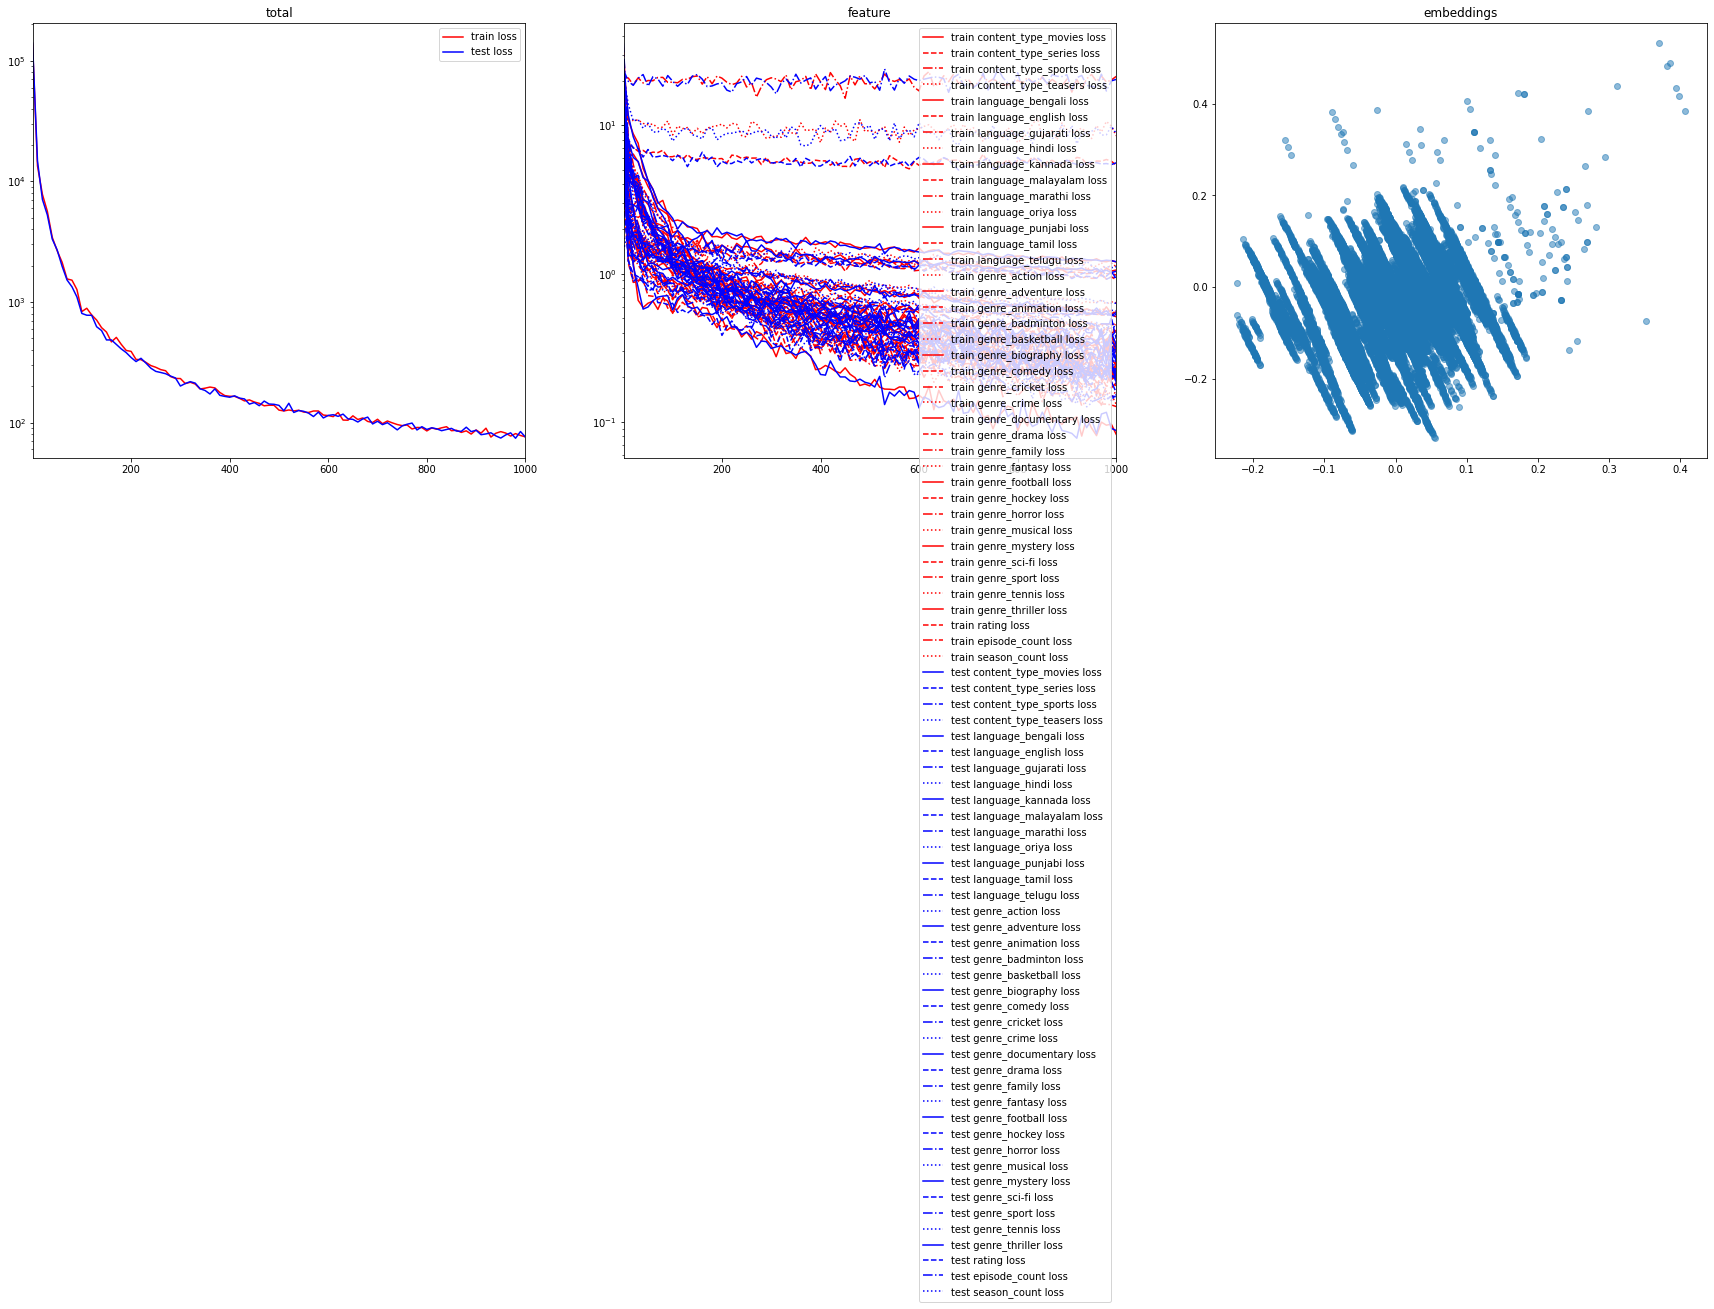

In [ ]:
#JMD
#@title Training a DNN Similarity Model

# Define some constants related to this dataset.
sparse_feature_names = ()
dense_feature_names = ('content_type_movies', 'content_type_series',
       'content_type_sports', 'content_type_teasers', 'language_bengali',
       'language_english', 'language_gujarati', 'language_hindi',
       'language_kannada', 'language_malayalam', 'language_marathi',
       'language_oriya', 'language_punjabi', 'language_tamil',
       'language_telugu', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_badminton', 'genre_basketball',
       'genre_biography', 'genre_comedy', 'genre_cricket', 'genre_crime',
       'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_football', 'genre_hockey', 'genre_horror',
       'genre_musical', 'genre_mystery', 'genre_sci-fi', 'genre_sport',
       'genre_tennis', 'genre_thriller', 'rating', 'episode_count', 'season_count')

# Set of features used as input to the similarity model.
input_feature_names = ('content_type_movies', 'content_type_series',
       'content_type_sports', 'content_type_teasers', 'language_bengali',
       'language_english', 'language_gujarati', 'language_hindi',
       'language_kannada', 'language_malayalam', 'language_marathi',
       'language_oriya', 'language_punjabi', 'language_tamil',
       'language_telugu', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_badminton', 'genre_basketball',
       'genre_biography', 'genre_comedy', 'genre_cricket', 'genre_crime',
       'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_football', 'genre_hockey', 'genre_horror',
       'genre_musical', 'genre_mystery', 'genre_sci-fi', 'genre_sport',
       'genre_tennis', 'genre_thriller', 'rating', 'episode_count', 'season_count', )
# Set of features used as output to the similarity model.
output_feature_names = ['content_type_movies', 'content_type_series',
       'content_type_sports', 'content_type_teasers', 'language_bengali',
       'language_english', 'language_gujarati', 'language_hindi',
       'language_kannada', 'language_malayalam', 'language_marathi',
       'language_oriya', 'language_punjabi', 'language_tamil',
       'language_telugu', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_badminton', 'genre_basketball',
       'genre_biography', 'genre_comedy', 'genre_cricket', 'genre_crime',
       'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_football', 'genre_hockey', 'genre_horror',
       'genre_musical', 'genre_mystery', 'genre_sci-fi', 'genre_sport',
       'genre_tennis', 'genre_thriller', 'rating', 'episode_count', 'season_count',]
# As a rule of thumb, a reasonable choice for the embedding dimension of a
# sparse feature column is the log2 of the cardinality of its vocabulary.
# sparse_input_feature_embedding_dims = { 'maker': 9, 'maker_location': 6, ... }
default_embedding_dims = {
    sfn: int(round(math.log(choc_data[sfn].nunique()) / math.log(2)))
    for sfn in set(sparse_feature_names).intersection(input_feature_names)
}
# Dictionary mapping each sparse input feature to the dimension of its embedding
# space.
sparse_input_feature_embedding_dims = default_embedding_dims  # can be a param

# Weight of the L2 regularization applied to the top embedding layer.
l2_regularization = 10  #@param
# List of dimensions of the hidden layers of the deep neural network.
hidden_dims = [20, 20]  #@param

print('------ build model')
with tf.Graph().as_default():
  similarity_model = SimilarityModel(
      choc_data,
      input_feature_names=input_feature_names,
      output_feature_names=output_feature_names,
      dense_feature_names=dense_feature_names,
      sparse_input_feature_embedding_dims=sparse_input_feature_embedding_dims,
      hidden_dims=hidden_dims,
      l2_regularization=l2_regularization,
      batch_size=100,
      use_bias=True,
      inspect=True)

print('------ train model')
similarity_model.train(
    num_iterations=1000,
    learning_rate=0.01,
    optimizer=tf.train.AdagradOptimizer)
print('\n')


In [ ]:
#@title Run cell to set up functions
def dfSimilarity(df,centroids):
  ### dfSimilarity = Calculate similarities for dataframe input
  ### We need to calculate ||a-b||^2 = |a|^2 + |b|^2 - 2*|a|*|b|
  ### Implement this with matrix operations
  ### See the Appendix for further explanation
  numPoints = len(df.index)
  numCentroids = len(centroids.index)
  ## Strictly speaking, we don't need to calculate the norm of points
  # because it adds a constant bias to distances
  # But calculating it so that the similarity doesn't go negative
  # And that we expect similarities in [0,1] which aids debugging
  pointNorms = np.square(nla.norm(df,axis=1))
  pointNorms = np.reshape(pointNorms,[numPoints,1])
  ## Calculate the norm of centroids
  centroidNorms = np.square(nla.norm(centroids,axis=1))
  centroidNorms = np.reshape(centroidNorms,(1,numCentroids))
  ## Calculate |a|^2 + |b|^2 - 2*|a|*|b|
  similarities = pointNorms + centroidNorms - 2.0*np.dot(df,np.transpose(centroids))
  # Divide by the number of features
  # Which is 10 because the one-hot encoding means the "Maker" and "Bean" are
  # weighted twice
  similarities = similarities/10.0
  # numerical artifacts lead to negligible but negative values that go to NaN on the root
  similarities = similarities.clip(min=0.0)
  # Square root since it's ||a-b||^2
  similarities = np.sqrt(similarities)
  return similarities

def initCentroids(df,k,feature_cols):
  # Pick 'k' examples are random to serve as initial centroids
  limit = len(df.index)
  centroids_key = np.random.randint(0,limit-1,k)
  centroids = df.loc[centroids_key,feature_cols].copy(deep=True)
  # the indexes get copied over so reset them
  centroids.reset_index(drop=True,inplace=True)
  return centroids

def pt2centroid(df,centroids,feature_cols):
  ### Calculate similarities between all points and centroids
  ### And assign points to the closest centroid + save that distance
  numCentroids = len(centroids.index)
  numExamples = len(df.index)
  # dfSimilarity = Calculate similarities for dataframe input
  dist = dfSimilarity(df.loc[:,feature_cols],centroids.loc[:,feature_cols])
  df.loc[:,'centroid'] = np.argmin(dist,axis=1) # closest centroid
  df.loc[:,'pt2centroid'] = np.min(dist,axis=1) # minimum distance
  return df

def recomputeCentroids(df,centroids,feature_cols):
  ### For every centroid, recompute it as an average of the points
  ### assigned to it
  numCentroids = len(centroids.index)
  for cen in range(numCentroids):
    dfSubset = df.loc[df['centroid'] == cen, feature_cols] # all points for centroid
    if not(dfSubset.empty): # if there are points assigned to the centroid
      clusterAvg = np.sum(dfSubset)/len(dfSubset.index)
      centroids.loc[cen] = clusterAvg
  return centroids

def kmeans(df,k,feature_cols,verbose):
  flagConvergence = False
  maxIter = 300
  iter = 0                      # ensure kmeans doesn't run for ever
  centroids = initCentroids(df,k,feature_cols)
  while not(flagConvergence):
    iter += 1
    #Save old mapping of points to centroids
    oldMapping = df['centroid'].copy(deep=True)
    # Perform k-means
    df = pt2centroid(df,centroids,feature_cols)
    centroids = recomputeCentroids(df,centroids,feature_cols)
    # Check convergence by comparing [oldMapping, newMapping]
    newMapping = df['centroid']
    flagConvergence = all(oldMapping == newMapping)
    if verbose == 1:
      print("Total distance:" + str(np.sum(df['pt2centroid'])))
    if (iter > maxIter):
      print('k-means did not converge! Reached maximum iteration limit of ' \
            + str(maxIter) + '.')
      sys.exit()
      return
  print('k-means converged for ' + str(k) + ' clusters' + \
        ' after ' + str(iter) + ' iterations!')
  return [df,centroids]

In [ ]:
k = 100 #@param

# Extract embeddings into a dataframe
choc_embed = similarity_model.embeddings
choc_embed = pd.DataFrame(choc_embed)

feature_cols = choc_embed.columns.values # save original columns
# initialize every point to an impossible value, the k+1 cluster
choc_embed['centroid'] = k
# init the point to centroid distance to an impossible value "2" (>1)
choc_embed['pt2centroid'] = 2
[choc_embed,centroids] = kmeans(choc_embed,k,feature_cols,1)
print("Data for the first few chocolates, with 'centroid' and 'pt2centroid' on the extreme right:")
choc_embed.head()

Total distance:1191.3646
Total distance:967.209
Total distance:902.9276
Total distance:875.1717
Total distance:862.33417
Total distance:851.00586
Total distance:840.5686
Total distance:832.75287
Total distance:823.4407
Total distance:812.97064
Total distance:809.1095
Total distance:806.63794
Total distance:804.5362
Total distance:803.2429
Total distance:802.59576
Total distance:802.3852
Total distance:802.1942
Total distance:802.1211
Total distance:802.04785
Total distance:802.0033
Total distance:801.05334
Total distance:798.48724
Total distance:796.3318
Total distance:795.2714
Total distance:793.7724
Total distance:792.43896
Total distance:792.13635
Total distance:791.94116
Total distance:791.7677
Total distance:791.5603
Total distance:791.38586
Total distance:790.98267
Total distance:789.654
Total distance:788.23
Total distance:788.2094
Total distance:788.20557
Total distance:788.20166
Total distance:788.18805
Total distance:788.14233
Total distance:788.06647
Total distance:788.0331


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,centroid,pt2centroid
0,-0.05,0.01,-0.03,-0.01,0.00,-0.00,0.01,0.01,0.01,-0.03,...,0.01,-0.01,0.02,-0.03,-0.06,0.02,-0.02,0.02,43,0.02
1,0.10,-0.11,-0.03,0.08,0.03,0.04,0.02,-0.02,0.04,-0.02,...,0.02,0.04,-0.05,0.01,0.04,-0.02,-0.01,0.04,39,0.01
2,0.05,0.09,0.10,-0.03,0.16,0.03,0.04,0.02,-0.09,-0.10,...,0.01,0.11,0.10,-0.06,0.03,-0.03,0.00,-0.05,5,0.03
3,0.08,-0.02,-0.04,0.05,0.06,-0.05,0.01,-0.02,0.05,-0.07,...,0.02,0.06,-0.04,-0.02,0.11,0.05,0.05,0.01,89,0.01
4,-0.02,0.06,-0.07,0.01,-0.06,-0.05,0.06,0.07,0.00,-0.14,...,-0.03,0.00,-0.07,-0.07,0.01,0.07,0.06,-0.05,69,0.02


In [ ]:
clusterNumber = 20 #@param
choc_data.loc[choc_embed['centroid']==clusterNumber,:]

,content_id,rating,episode_count,season_count,content_type_movies,content_type_series,content_type_sports,content_type_teasers,language_bengali,language_english,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
19,cont_43_13_8,2,8,13,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,cont_4125_6_5,10,5,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,cont_944_20_10,4,10,20,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
304,cont_658_7_29,3,29,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,cont_3894_1_10,5,10,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47889,cont_608_2_3,8,3,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48321,cont_582_5_17,4,17,5,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
48380,cont_4274_4_42,1,42,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48406,cont_3704_1_1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#@title Run cell to setup functions { display-mode: "form" }
def clusterCardinality(df):
  k = np.max(df["centroid"]) + 1
  if six.PY2:
    k = k.astype(int)
  print("Number of clusters:"+str(k))
  clCard = np.zeros(k)
  for kk in range(k):
    clCard[kk] = np.sum(df["centroid"]==kk)
  if six.PY2:
    clCard = clCard.astype(int)
  # print "Cluster Cardinality:"+str(clCard)
  plt.figure()
  plt.bar(range(k),clCard)
  plt.title('Cluster Cardinality')
  plt.xlabel('Cluster Number: '+str(0)+' to '+str(k-1))
  plt.ylabel('Points in Cluster')
  return clCard

def clusterMagnitude(df):
  k = np.max(df["centroid"]) + 1
  if six.PY2:
    k = k.astype(int)
  cl = np.zeros(k)
  clMag = np.zeros(k)
  for kk in range(k):
    idx = np.where(df["centroid"]==kk)
    idx = idx[0]
    clMag[kk] = np.sum(df.loc[idx,"pt2centroid"])
  # print "Cluster Magnitude:",clMag #precision set using np pref
  plt.figure()
  plt.bar(range(k),clMag)
  plt.title('Cluster Magnitude')
  plt.xlabel('Cluster Number: '+str(0)+' to '+str(k-1))
  plt.ylabel('Total Point-to-Centroid Distance')
  return clMag

def plotCardVsMag(clCard,clMag):
  plt.figure()
  plt.scatter(clCard,clMag)
  plt.xlim(xmin=0)
  plt.ylim(ymin=0)
  plt.title('Magnitude vs Cardinality')
  plt.ylabel('Magnitude')
  plt.xlabel('Cardinality')

def clusterQualityMetrics(df):
  clCard = clusterCardinality(df)
  clMag = clusterMagnitude(df)
  plotCardVsMag(clCard,clMag)

Number of clusters:100


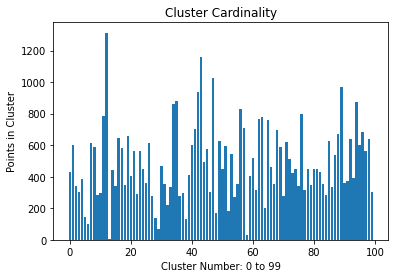

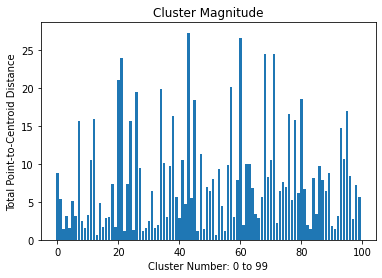

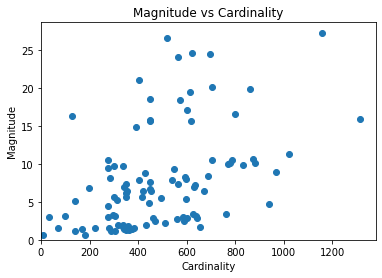

In [ ]:
clusterQualityMetrics(choc_embed)

In [ ]:
# Plot loss vs number of clusters
def lossVsClusters(kmin, kmax, kstep, choc_data):
  kmax += 1  # include kmax-th cluster in range
  kRange = range(kmin, kmax, kstep)
  loss = np.zeros(len(kRange))
  lossCtr = 0
  for kk in kRange:
    [choc_data, centroids] = kmeans(choc_data, kk, feature_cols, 0)
    loss[lossCtr] = np.sum(choc_data['pt2centroid'])
    lossCtr += 1
  plt.scatter(kRange, loss)
  plt.title('Loss vs Clusters Used')
  plt.xlabel('Number of clusters')
  plt.ylabel('Total Point-to-Centroid Distance')


kmin = 5  # @param
kmax = 300  # @param
kstep = 20  # @param
lossVsClusters(kmin, kmax, kstep, choc_embed)

k-means converged for 5 clusters after 23 iterations!
k-means converged for 25 clusters after 107 iterations!
k-means converged for 45 clusters after 55 iterations!
k-means converged for 65 clusters after 98 iterations!
k-means converged for 85 clusters after 118 iterations!
k-means converged for 105 clusters after 129 iterations!
k-means converged for 125 clusters after 53 iterations!
k-means converged for 145 clusters after 120 iterations!
k-means converged for 165 clusters after 138 iterations!
k-means converged for 185 clusters after 102 iterations!
k-means converged for 205 clusters after 134 iterations!
k-means did not converge! Reached maximum iteration limit of 300.


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [44]:
choc_embeddings = similarity_model.embeddings
choc_embeddings = pd.DataFrame(choc_embeddings)

In [45]:
choc_embed

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,centroid,pt2centroid
0,-0.05,0.01,-0.03,-0.01,0.00,-0.00,0.01,0.01,0.01,-0.03,...,0.01,-0.01,0.02,-0.03,-0.06,0.02,-0.02,0.02,173,0.01
1,0.10,-0.11,-0.03,0.08,0.03,0.04,0.02,-0.02,0.04,-0.02,...,0.02,0.04,-0.05,0.01,0.04,-0.02,-0.01,0.04,11,0.01
2,0.05,0.09,0.10,-0.03,0.16,0.03,0.04,0.02,-0.09,-0.10,...,0.01,0.11,0.10,-0.06,0.03,-0.03,0.00,-0.05,179,0.03
3,0.08,-0.02,-0.04,0.05,0.06,-0.05,0.01,-0.02,0.05,-0.07,...,0.02,0.06,-0.04,-0.02,0.11,0.05,0.05,0.01,127,0.00
4,-0.02,0.06,-0.07,0.01,-0.06,-0.05,0.06,0.07,0.00,-0.14,...,-0.03,0.00,-0.07,-0.07,0.01,0.07,0.06,-0.05,96,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,-0.00,0.09,-0.04,-0.06,0.01,0.00,0.03,0.07,0.04,-0.05,...,0.02,-0.03,-0.05,-0.01,0.00,-0.01,0.08,-0.05,122,0.03
48641,0.06,0.04,-0.06,0.02,-0.09,-0.00,0.04,0.04,-0.02,-0.06,...,-0.01,-0.05,-0.12,-0.00,0.05,-0.04,0.01,-0.09,97,0.03
48642,-0.10,-0.04,-0.01,-0.01,-0.02,0.09,0.00,-0.03,-0.05,0.01,...,0.01,-0.07,0.05,-0.01,-0.08,-0.06,-0.05,-0.04,42,0.01
48643,-0.06,-0.12,0.03,0.11,-0.02,-0.02,0.01,0.01,0.01,0.01,...,0.01,0.03,-0.02,0.07,0.10,0.11,-0.03,0.01,81,0.01


In [46]:
choc_embeddings

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.05,0.01,-0.03,-0.01,0.00,-0.00,0.01,0.01,0.01,-0.03,0.04,0.04,0.01,-0.01,0.02,-0.03,-0.06,0.02,-0.02,0.02
1,0.10,-0.11,-0.03,0.08,0.03,0.04,0.02,-0.02,0.04,-0.02,0.03,-0.02,0.02,0.04,-0.05,0.01,0.04,-0.02,-0.01,0.04
2,0.05,0.09,0.10,-0.03,0.16,0.03,0.04,0.02,-0.09,-0.10,-0.06,-0.08,0.01,0.11,0.10,-0.06,0.03,-0.03,0.00,-0.05
3,0.08,-0.02,-0.04,0.05,0.06,-0.05,0.01,-0.02,0.05,-0.07,0.05,-0.04,0.02,0.06,-0.04,-0.02,0.11,0.05,0.05,0.01
4,-0.02,0.06,-0.07,0.01,-0.06,-0.05,0.06,0.07,0.00,-0.14,0.04,0.10,-0.03,0.00,-0.07,-0.07,0.01,0.07,0.06,-0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48640,-0.00,0.09,-0.04,-0.06,0.01,0.00,0.03,0.07,0.04,-0.05,0.00,-0.05,0.02,-0.03,-0.05,-0.01,0.00,-0.01,0.08,-0.05
48641,0.06,0.04,-0.06,0.02,-0.09,-0.00,0.04,0.04,-0.02,-0.06,-0.04,0.10,-0.01,-0.05,-0.12,-0.00,0.05,-0.04,0.01,-0.09
48642,-0.10,-0.04,-0.01,-0.01,-0.02,0.09,0.00,-0.03,-0.05,0.01,-0.08,0.11,0.01,-0.07,0.05,-0.01,-0.08,-0.06,-0.05,-0.04
48643,-0.06,-0.12,0.03,0.11,-0.02,-0.02,0.01,0.01,0.01,0.01,0.06,0.01,0.01,0.03,-0.02,0.07,0.10,0.11,-0.03,0.01


In [47]:
from sklearn.metrics.pairwise import cosine_similarity

In [142]:
all_content_id = choc_data_original['content_id'].values

In [48]:
choc_embed_array = choc_embeddings.to_numpy()

In [49]:
choc_embed_array[[0]]

array([[-5.4934561e-02,  6.4786947e-03, -2.8142279e-02, -1.3356955e-02,
         5.7298217e-05, -2.0959252e-03,  8.6676646e-03,  9.4202785e-03,
         1.0962149e-02, -3.3585902e-02,  3.6697991e-02,  3.5575133e-02,
         1.3588397e-02, -5.2543147e-03,  2.1469075e-02, -3.2470390e-02,
        -5.5660546e-02,  2.1866344e-02, -2.4823308e-02,  1.7316446e-02]],
      dtype=float32)

In [146]:
choc_embed_array[0][0]

-0.05493456

In [141]:
content_embeddings = {}

In [147]:
for i in range(len(all_content_id)):
  content_embeddings[all_content_id[i]] = choc_embed_array[i]

In [150]:
content_embeddings['cont_1000_1_12']

array([ 0.05227538,  0.09633586, -0.02761177, -0.02799781,  0.00874761,
       -0.05781449,  0.04199415,  0.02901606, -0.01324391, -0.07510153,
        0.02268603,  0.01066099, -0.04614037,  0.00339978, -0.05210014,
       -0.04332522,  0.03999877,  0.0160476 ,  0.06757808, -0.00857592],
      dtype=float32)

In [50]:
similarity_list = []
for i in range(len(choc_embed_array)):
  similarity_list.append([i, cosine_similarity(choc_embed_array[[3]], choc_embed_array[[i]])[0][0]])

In [51]:
sorted_similarity_list = sorted(similarity_list, key= lambda x:x[1], reverse=True)
positive_list = sorted_similarity_list[0:10]
negative_list = sorted_similarity_list[-11:-1]

In [52]:
choc_data.loc[[6]]

,content_id,rating,episode_count,season_count,content_type_movies,content_type_series,content_type_sports,content_type_teasers,language_bengali,language_english,...,genre_fantasy,genre_football,genre_hockey,genre_horror,genre_musical,genre_mystery,genre_sci-fi,genre_sport,genre_tennis,genre_thriller
6,cont_2208_1_24,7,24,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
choc_print = choc_data_original.copy()
choc_print[['index', 'score']] = similarity_list

In [54]:
choc_print.head(10)

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count,index,score
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19,0.00,-0.26
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15,1.00,0.62
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13,2.00,0.16
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1,3.00,1.00
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10,4.00,0.29
5,cont_51_1_37,series,hindi,comedy,3060000,2002-02-04,10,37,1,5.00,0.21
6,cont_2208_1_24,series,marathi,drama,3600000,2011-07-09,7,24,1,6.00,0.17
7,cont_2679_5_17,series,hindi,comedy,3240000,1994-05-03,7,17,5,7.00,-0.29
8,cont_4790_4_19,series,marathi,drama,3060000,2020-12-18,1,19,4,8.00,0.15
9,cont_1437_5_25,series,hindi,comedy,2880000,2002-05-27,1,25,5,9.00,0.24


In [55]:
sort_choc = choc_print.sort_values(by=['score'], ascending=False)

In [56]:
sort_choc.head(15)

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count,index,score
22218,cont_4426_2_23,series,english,horror,3000000,2002-09-14,2,23,2,22218.00,1.00
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1,3.00,1.00
11601,cont_2_3_41,series,hindi,horror,3480000,2003-12-01,8,41,3,11601.00,1.00
8531,cont_2446_2_10,series,tamil,drama,3420000,2004-09-18,9,10,2,8531.00,1.00
42206,cont_407_1_9,series,hindi,comedy,2460000,2018-04-22,9,9,1,42206.00,1.00
13031,cont_1223_7_34,series,english,drama,3360000,2011-05-25,10,34,7,13031.00,1.00
11095,cont_1223_5_19,series,english,drama,3840000,2008-06-21,10,19,5,11095.00,1.00
21640,cont_960_6_11,series,malayalam,comedy,4260000,2000-07-11,5,11,6,21640.00,1.00
16250,cont_1815_6_55,series,hindi,comedy,3360000,2011-03-29,5,55,6,16250.00,1.00
11381,cont_2043_9_12,series,hindi,horror,2460000,2005-09-17,2,12,9,11381.00,1.00


In [57]:
sort_choc.to_csv('sorted_choc.csv', index=False)

In [58]:
from scipy.spatial import distance

In [59]:
similarity_list_e = []
for i in range(len(choc_embed_array)):
  similarity_list_e.append([i, distance.euclidean(choc_embed_array[[3838]], choc_embed_array[[i]])])

In [60]:
sorted_similarity_list_e = sorted(similarity_list_e, key= lambda x:x[1])
positive_list_e = sorted_similarity_list_e[0:15]
negative_list_e = sorted_similarity_list_e[-11:-1]

In [61]:
choc_print_e = choc_data_original.copy()
choc_print_e[['index', 'score']] = similarity_list_e

In [62]:
choc_print_e.head(10)

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count,index,score
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19,0.00,0.32
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15,1.00,0.25
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13,2.00,0.42
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1,3.00,0.27
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10,4.00,0.45
5,cont_51_1_37,series,hindi,comedy,3060000,2002-02-04,10,37,1,5.00,0.23
6,cont_2208_1_24,series,marathi,drama,3600000,2011-07-09,7,24,1,6.00,0.24
7,cont_2679_5_17,series,hindi,comedy,3240000,1994-05-03,7,17,5,7.00,0.34
8,cont_4790_4_19,series,marathi,drama,3060000,2020-12-18,1,19,4,8.00,0.32
9,cont_1437_5_25,series,hindi,comedy,2880000,2002-05-27,1,25,5,9.00,0.44


In [63]:
sort_choc_e = choc_print_e.sort_values(by=['score'], ascending=True)

In [64]:
sort_choc_e.head(15)

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count,index,score
3950,cont_287_14_29,series,hindi,drama,4800000,2016-05-03,7,29,14,3950.00,0.00
47804,cont_780_8_32,series,hindi,comedy,3120000,2009-01-22,8,32,8,47804.00,0.00
3838,cont_164,movies,hindi,musical,6120000,2001-11-04,3,0,0,3838.00,0.00
45062,cont_4281_2_9,series,hindi,drama,5580000,1999-11-13,4,9,2,45062.00,0.00
35472,cont_4274_1_30,series,marathi,comedy,3540000,2007-09-12,1,30,1,35472.00,0.00
21790,cont_4104_4_27,series,hindi,action,2820000,1997-01-06,3,27,4,21790.00,0.00
44515,cont_1815_1_52,series,hindi,comedy,3240000,2001-04-14,5,52,1,44515.00,0.00
41819,cont_1873_12_18,series,english,comedy,3300000,2008-02-29,3,18,12,41819.00,0.00
46750,cont_3597_8_8,series,hindi,drama,3240000,2008-11-14,2,8,8,46750.00,0.01
18286,cont_2257_1_8,sports,hindi,cricket,3120000,2011-09-09,0,8,1,18286.00,0.01


In [65]:
test_df.head()

,user_id
0,user_18085@domain.com
1,user_16044@domain.com
2,user_13110@domain.com
3,user_18909@domain.com
4,user_15509@domain.com


In [69]:
relationship_df.head()

,user_id,content_id
0,user_44902@domain.com,cont_1718_16_7
1,user_87018@domain.com,cont_825_1_3
2,user_53430@domain.com,cont_1981_2_26
3,user_53696@domain.com,cont_1072_18_7
4,user_80251@domain.com,cont_760_9_27


In [70]:
user_id = ['user_18085@domain.com']

In [71]:
relationship_df

,user_id,content_id
0,user_44902@domain.com,cont_1718_16_7
1,user_87018@domain.com,cont_825_1_3
2,user_53430@domain.com,cont_1981_2_26
3,user_53696@domain.com,cont_1072_18_7
4,user_80251@domain.com,cont_760_9_27
...,...,...
1048570,user_37967@domain.com,cont_4082_7_28
1048571,user_69120@domain.com,cont_335_7_14
1048572,user_44960@domain.com,cont_4802_16_23
1048573,user_83559@domain.com,cont_4954_1_13


In [73]:
filtered_relationship_df = relationship_df.loc[relationship_df['user_id'] == 'user_18085@domain.com']
filtered_relationship_df.shape[0]
content_id_df = filtered_relationship_df[['content_id']]

In [74]:
combined_df = choc_data_original[choc_data_original['content_id'].isin(content_id_df['content_id'].values.tolist())]

In [75]:
combined_df

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
143,cont_2870_3_17,series,telugu,drama,3300000,2007-11-09,1,17,3
476,cont_1699_3_14,series,malayalam,comedy,3420000,2008-08-13,1,14,3
480,cont_2365_1_1,series,telugu,action,2880000,2013-05-06,9,1,1
649,cont_1946_8_14,series,malayalam,comedy,2520000,2019-12-31,1,14,8
672,cont_4215_3_8,series,telugu,documentary,2520000,2013-10-01,10,8,3
...,...,...,...,...,...,...,...,...,...
47506,cont_357_6_24,series,malayalam,sci-fi,3420000,1998-07-22,10,24,6
47868,cont_1587_4_3,series,telugu,comedy,4260000,2003-07-30,7,3,4
48206,cont_1060_4_15,series,telugu,drama,5580000,2013-12-09,3,15,4
48224,cont_4811_15_13,series,telugu,drama,3480000,2020-08-06,7,13,15


In [76]:
choc_data_original[['content_id', 'genre','language','content_type']]

,content_id,genre,language,content_type
0,cont_475_19_32,drama,english,series
1,cont_2185_15_21,drama,english,series
2,cont_4857_13_28,comedy,tamil,series
3,cont_3340_1_5,cricket,hindi,sports
4,cont_1664_10_29,action,hindi,series
...,...,...,...,...
48640,cont_4218_6_15,drama,hindi,series
48641,cont_2533_1_14,sci-fi,marathi,series
48642,cont_4606_33_5,drama,hindi,series
48643,cont_3708_9_1,drama,english,series


In [77]:

user_content_list = filtered_relationship_df['content_id']

In [78]:
user_content_list

2521        cont_1466_2_10
3274        cont_593_22_11
9608       cont_1466_18_21
16639        cont_327_1_27
17458        cont_4879_3_7
                ...       
997158       cont_4446_9_5
997250      cont_4498_33_2
1011530     cont_3195_6_21
1032302      cont_3894_7_2
1039091      cont_4860_2_6
Name: content_id, Length: 182, dtype: object

In [79]:
filtered_relationship_df = relationship_df.loc[relationship_df['user_id'] == 'user_18085@domain.com']
filtered_relationship_df.head()
content_array = filtered_relationship_df['content_id'][0:3]
print(content_array)

2521     cont_1466_2_10
3274     cont_593_22_11
9608    cont_1466_18_21
Name: content_id, dtype: object


In [80]:
for i in range(len(content_array)):
  similarity_list = []
  for j in range(len(choc_embed_array)):
    similarity_list.append([j, cosine_similarity(choc_embed_array[[i]], choc_embed_array[[j]])[0][0]])
    # choc_print = choc_data_original.copy()
    # choc_print[['index', 'score']] = similarity_list
    
print(similarity_list)

[[0, -0.16723767], [1, -0.11559377], [2, 1.0000001], [3, 0.15572733], [4, -0.08789376], [5, 0.27857378], [6, 0.29501832], [7, -0.15413152], [8, -0.4434548], [9, -0.36816582], [10, -0.15089601], [11, 0.27862743], [12, 0.19187719], [13, -0.13098538], [14, -0.102512404], [15, 0.2466538], [16, -0.06580859], [17, -0.16170269], [18, 0.30419657], [19, -0.2774268], [20, -0.38631204], [21, 0.41647568], [22, -0.058509946], [23, 0.21270785], [24, 0.3435286], [25, 0.22862941], [26, -0.050430365], [27, 0.3173704], [28, -0.13845749], [29, 0.21600434], [30, 0.16201864], [31, -0.104472406], [32, -0.26960245], [33, -0.78439516], [34, -0.09579448], [35, -0.10488694], [36, -0.13515604], [37, -0.12862203], [38, -0.2515054], [39, -0.24783157], [40, -0.3578962], [41, -0.122861885], [42, 0.27618363], [43, 0.35422608], [44, -0.35271662], [45, -0.14010784], [46, -0.12932763], [47, 0.30759478], [48, -0.19631004], [49, -0.27407134], [50, 0.18833493], [51, -0.5841334], [52, -0.18398061], [53, 0.51366574], [54, -0

In [81]:
similarity_list = []
for i in range(len(choc_embed_array)):
  similarity_list.append([i, cosine_similarity(choc_embed_array[[3]], choc_embed_array[[i]])[0][0]])
  choc_print = choc_data_original.copy()
  choc_print[['index', 'score']] = similarity_list

  sorted_similarity_list = sorted(similarity_list, key= lambda x:x[1], reverse=True)


ValueError: ignored

In [83]:
import random

In [84]:
answer_list = choc_data_original['content_id'].values.tolist()

In [85]:
jsonObj = js

NameError: ignored

In [ ]:
test_df

In [89]:
# Test Examples

# user_16044@domain.com
# user_13110@domain.com
# user_13422@domain.com

In [86]:
watched_content = relationship_df.loc[relationship_df['user_id'] == 'user_16044@domain.com']
watched_content

,user_id,content_id
7102,user_16044@domain.com,cont_1959_1_25
8131,user_16044@domain.com,cont_2625_2_16
8772,user_16044@domain.com,cont_4149_7_47
9352,user_16044@domain.com,cont_593_19_12
10233,user_16044@domain.com,cont_588_1_33
...,...,...
1032893,user_16044@domain.com,cont_3114_4_8
1045885,user_16044@domain.com,cont_663_1_10
1047048,user_16044@domain.com,cont_973_14_1
1047316,user_16044@domain.com,cont_1020_13_30


In [87]:
choc_data_original.head()

,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,cont_475_19_32,series,english,drama,4980000,2018-07-01,10,32,19
1,cont_2185_15_21,series,english,drama,3000000,2016-03-29,4,21,15
2,cont_4857_13_28,series,tamil,comedy,3120000,2006-03-06,8,28,13
3,cont_3340_1_5,sports,hindi,cricket,9900000,2009-01-10,0,5,1
4,cont_1664_10_29,series,hindi,action,3660000,2020-05-25,2,29,10


In [95]:
watched_content_data = pd.merge(watched_content, choc_data_original, on='content_id', how='left')
pd.merge(watched_content, choc_data_original, on='content_id', how='left')

,user_id,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,user_16044@domain.com,cont_1959_1_25,series,hindi,comedy,3540000,2008-08-19,4,25,1
1,user_16044@domain.com,cont_2625_2_16,series,telugu,sci-fi,3660000,2004-03-26,8,16,2
2,user_16044@domain.com,cont_4149_7_47,series,telugu,drama,4380000,2013-02-04,6,47,7
3,user_16044@domain.com,cont_593_19_12,series,telugu,sci-fi,4380000,2008-08-09,5,12,19
4,user_16044@domain.com,cont_588_1_33,series,oriya,drama,2760000,2003-07-22,7,33,1
...,...,...,...,...,...,...,...,...,...,...
335,user_16044@domain.com,cont_3114_4_8,series,oriya,drama,2760000,2014-06-02,8,8,4
336,user_16044@domain.com,cont_663_1_10,series,oriya,drama,3240000,2005-08-07,10,10,1
337,user_16044@domain.com,cont_973_14_1,series,hindi,comedy,3060000,2013-10-05,4,1,14
338,user_16044@domain.com,cont_1020_13_30,series,hindi,horror,3720000,2012-11-02,3,30,13


In [133]:
if watched_content_data.shape[0] > 20:
  content_languages = watched_content_data['language'].value_counts().index.to_list()
  if len(content_languages) > 2:
    content_languages = content_languages[:2]

  content_genres = watched_content_data['genre'].value_counts().index.to_list()
  if len(content_genres) > 2:
    content_genres = content_genres[:2]

  watched_content_data = watched_content_data.loc[watched_content_data['language'].isin(content_languages) & watched_content_data['genre'].isin(content_genres)]



  
  

In [127]:
watched_content_data['language'].value_counts()

hindi     152
telugu    120
oriya      68
Name: language, dtype: int64

In [115]:
watched_content_data['genre'].value_counts()

drama          167
comedy          68
action          46
sci-fi          27
horror          16
documentary     11
cricket          3
football         1
tennis           1
Name: genre, dtype: int64

In [132]:
watched_content_data.loc[watched_content_data['language'].isin(['hindi', 'telugu']) & watched_content_data['genre'].isin(['drama', 'comedy'])]

,user_id,content_id,content_type,language,genre,duration,release_date,rating,episode_count,season_count
0,user_16044@domain.com,cont_1959_1_25,series,hindi,comedy,3540000,2008-08-19,4,25,1
2,user_16044@domain.com,cont_4149_7_47,series,telugu,drama,4380000,2013-02-04,6,47,7
5,user_16044@domain.com,cont_3565_8_29,series,telugu,drama,3420000,2008-10-17,1,29,8
6,user_16044@domain.com,cont_3565_2_3,series,telugu,drama,3120000,1998-09-04,1,3,2
7,user_16044@domain.com,cont_890_15_14,series,telugu,drama,3120000,2018-12-16,4,14,15
...,...,...,...,...,...,...,...,...,...,...
330,user_16044@domain.com,cont_4189_5_17,series,telugu,drama,2760000,2009-03-04,5,17,5
332,user_16044@domain.com,cont_1616_5_12,series,telugu,comedy,3540000,2008-08-03,1,12,5
334,user_16044@domain.com,cont_1269_7_5,series,hindi,comedy,3420000,2010-10-23,7,5,7
337,user_16044@domain.com,cont_973_14_1,series,hindi,comedy,3060000,2013-10-05,4,1,14


In [137]:
final_user_content_list = watched_content_data['content_id'].values

In [172]:
similarity_list = []
for i in range(len(choc_embed_array)):
  similarity_list.append([i, cosine_similarity(np.reshape(content_embeddings['cont_1000_1_10'],(1,20)), choc_embed_array[[i]])[0][0]])

In [173]:
sorted_similarity_list_e = sorted(similarity_list_e, key= lambda x:x[1])
positive_list_e = sorted_similarity_list_e[0:15]
negative_list_e = sorted_similarity_list_e[-11:-1]

In [153]:
positive_list

(48645, 20)

In [157]:
choc_embed_array[1]

array([ 0.09649919, -0.10765628, -0.03153155,  0.08300938,  0.03166552,
        0.03612269,  0.01907544, -0.02213845,  0.0415936 , -0.01606942,
        0.03379989, -0.02130837,  0.01967991,  0.04417988, -0.05397728,
        0.00929341,  0.04288977, -0.01797175, -0.01483941,  0.03785944],
      dtype=float32)

In [163]:
choc_embed_array[[1]].shape

(1, 20)

In [170]:
np.reshape(content_embeddings['cont_1000_1_10'], (1,20))

array([[-0.03631755, -0.05693401, -0.03835863,  0.02853384,  0.02539484,
        -0.00033004, -0.00573706, -0.01563387,  0.04227041, -0.03305745,
         0.05345508,  0.00888635,  0.05014002,  0.02415183,  0.02406773,
        -0.02017258, -0.01632926,  0.03929991, -0.03253734,  0.03053611]],
      dtype=float32)

In [171]:
content_embeddings['cont_1000_1_10']

array([-0.03631755, -0.05693401, -0.03835863,  0.02853384,  0.02539484,
       -0.00033004, -0.00573706, -0.01563387,  0.04227041, -0.03305745,
        0.05345508,  0.00888635,  0.05014002,  0.02415183,  0.02406773,
       -0.02017258, -0.01632926,  0.03929991, -0.03253734,  0.03053611],
      dtype=float32)